## Project Name- Netflix Data: Cleaning, Analysis, and Visualization

### Made by: T. Swayam Siddhant

### Step-1: Importing Important Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import Plotly libraries for Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Step-2: Loading the Dataset

In [41]:
data = pd.read_csv('/Users/swayamsiddhant/Documents/DATA SCIENCE/Projects/Unified Mentor (Project-3) Netflix Data-Cleaning, Analysis and Visualization/netflix1.csv')
print("--- Initial Data Head ---")
print(data.head())
print("\n--- Initial Data Info ---")
print(data.info())
print("\n--- Initial Data Shape ---")
print(data.shape)

--- Initial Data Head ---
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...

### Step-3: Data Cleaning

In [42]:
# Identifying and handling missing data, correct data types, and drop duplicates
print("\n--- Data Cleaning: Checking for Missing Values ---")
print(data.isnull().sum())

print("\n--- Data Cleaning: Dropping Duplicates ---")
initial_rows = data.shape[0]
data.drop_duplicates(inplace = True)
print(f"Dropped {initial_rows - data.shape[0]} duplicate rows.")

# As per the requirement, the rows with missing information is to be dropped.
# Now we need to check 'director', 'cast', 'country' does not have any null values because in-general they should not have.
print("\n--- Data Cleaning: Dropping Rows with Missing Critical Information (director, cast, country) ---")

# First checking for 'Cast' column
if 'cast' in data.columns:
    data.dropna(subset = ['director', 'cast', 'country'], inplace = True)
else:
    data.dropna(subset = ['director', 'country'], inplace = True)
print(f"Shape after dropping rows with missing critical info: {data.shape}")
print("\n--- Data Cleaning: Converting 'data_added' to Datetime ---")
data['date_added'] = pd.to_datetime(data['date_added'], errors = 'coerce')

# Dropping the Rows where 'date_added' became NaT after conversion
initial_rows_after_duplicates = data.shape[0]
data.dropna(subset = ['date_added'], inplace = True)
print(f"Dropped {initial_rows_after_duplicates - data.shape[0]} rows with invalid 'date_added'.")
print("\n--- Data Cleaning: Showing Data Types to Confirm Changes ---")
print(data.dtypes)


--- Data Cleaning: Checking for Missing Values ---
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

--- Data Cleaning: Dropping Duplicates ---
Dropped 0 duplicate rows.

--- Data Cleaning: Dropping Rows with Missing Critical Information (director, cast, country) ---
Shape after dropping rows with missing critical info: (8790, 10)

--- Data Cleaning: Converting 'data_added' to Datetime ---
Dropped 0 rows with invalid 'date_added'.

--- Data Cleaning: Showing Data Types to Confirm Changes ---
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


### Step-4: Exploratory Data Analysis (EDA)

#### 1. Content Type Distribution (Movies vs. TV Shows)


--- EDA: Content Type Distribution (Movies vs. TV Shows) ---
type
Movie      6126
TV Show    2664
Name: count, dtype: int64


/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_5160/1053750950.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




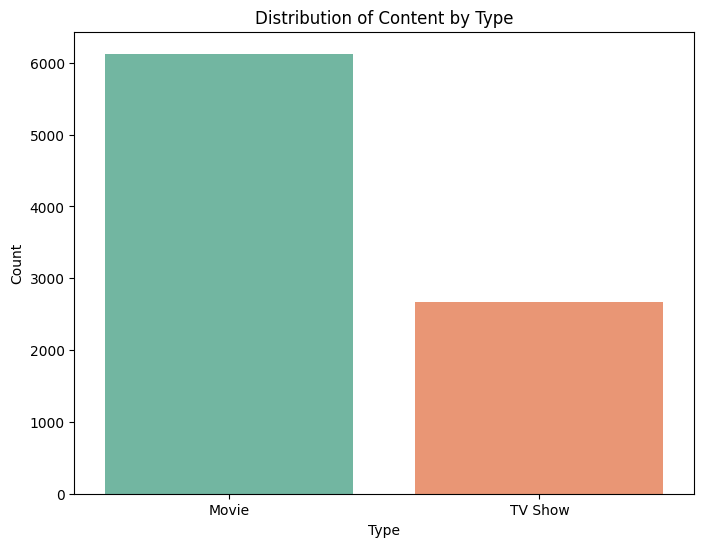

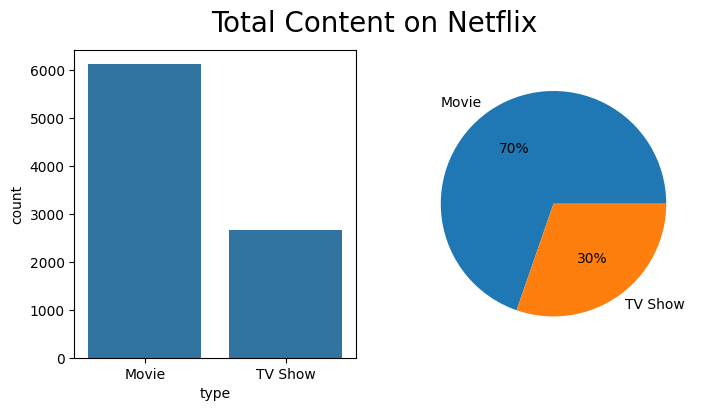

In [43]:
print("\n--- EDA: Content Type Distribution (Movies vs. TV Shows) ---")
type_counts = data['type'].value_counts()
print(type_counts)

plt.figure(figsize = (8,6))
sns.barplot(x = type_counts.index, y = type_counts.values, palette = 'Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Replicating the pie chart for content distribution
freq = data['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.countplot(data = data, x = 'type', ax = axes[0])
axes[1].pie(freq, labels = ['Movie', 'TV Show'], autopct = '%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize = 20)
plt.show()

#### 2. Most Common Genres


--- EDA: Most Common Genres ---
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_5160/1903711246.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




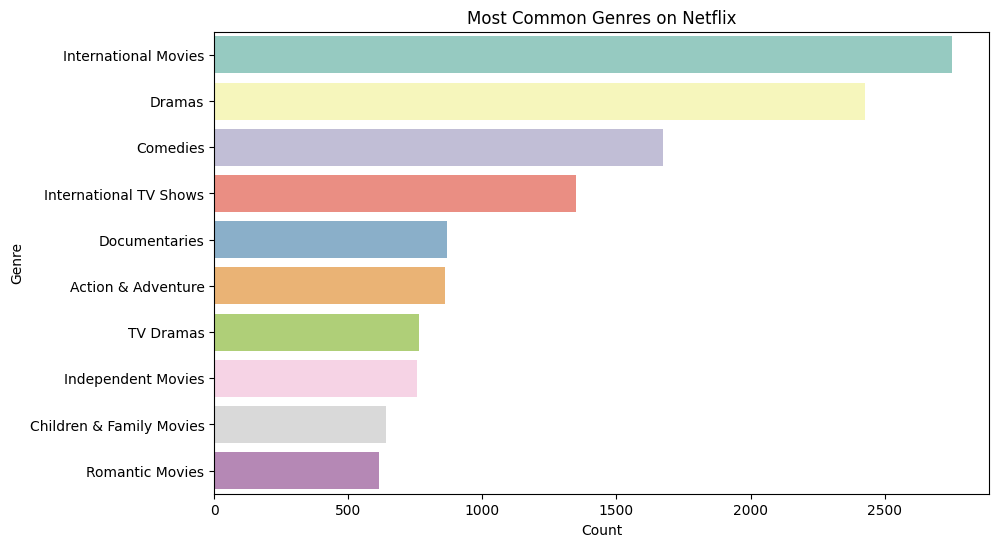

In [44]:
print("\n--- EDA: Most Common Genres ---")
# We need to split the "listed_in" into coulmns and count genres
# It is mandatory to treat "listed_in" as string before splitting
data['genres'] = data['listed_in'].astype(str).apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
print(genre_counts)

plt.figure(figsize = (10, 6))
sns.barplot(x = genre_counts.values, y = genre_counts.index, palette = 'Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### 3. Content Added Over Time


--- EDA: Content Added Over Time ---


/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_5160/533533531.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




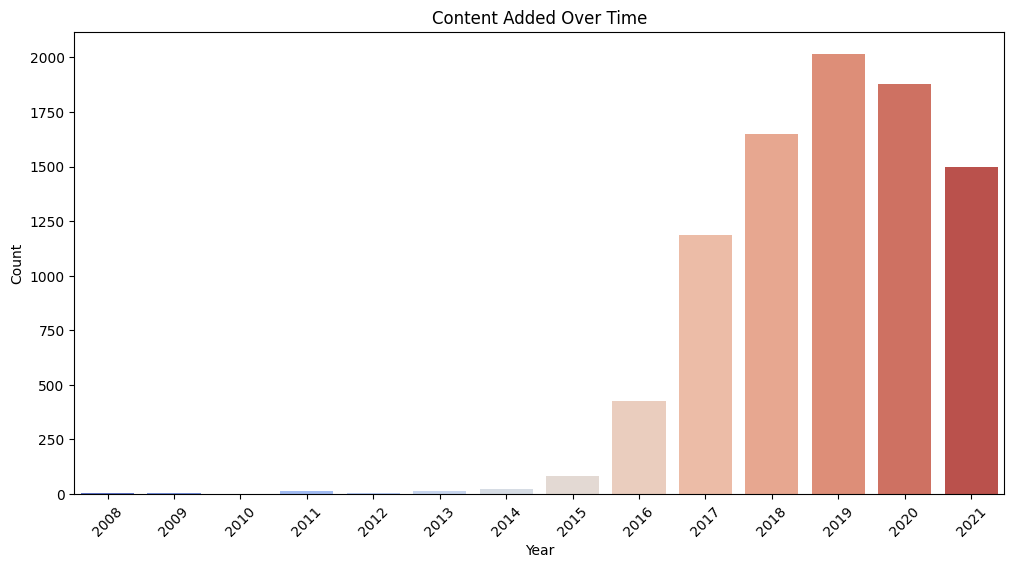


--- EDA: Monthly releases of Movies and TV Shows on Netflix ---


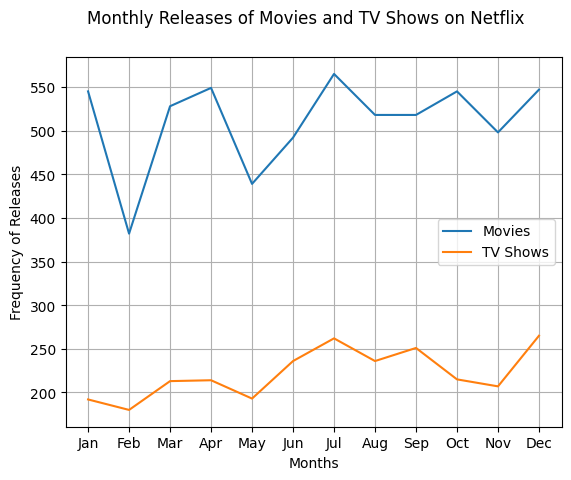


--- EDA: Yearly releases of Movies amd TV Shows on Netflix ---


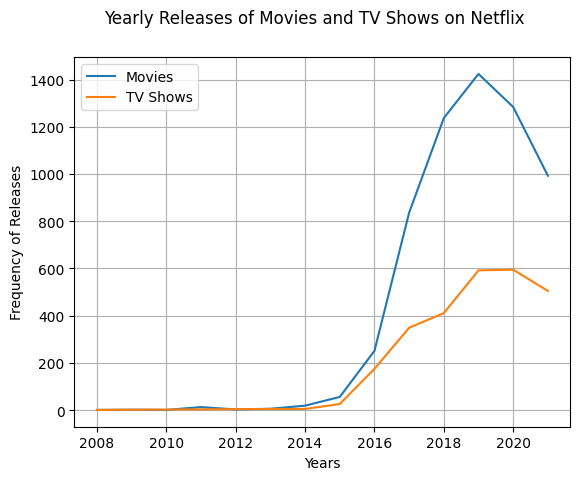

In [45]:
print("\n--- EDA: Content Added Over Time ---")
# Extracting Year and Month from "date_added"
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Plot content added over the years
plt.figure(figsize = (12, 6))
sns.countplot(x = 'year_added', data = data, palette = 'coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Replicating Monthly and Yearly releases
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

print("\n--- EDA: Monthly releases of Movies and TV Shows on Netflix ---")
monthly_movie_release = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label = 'Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label = 'TV Shows')
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly Releases of Movies and TV Shows on Netflix")
plt.show()

print("\n--- EDA: Yearly releases of Movies amd TV Shows on Netflix ---")
yearly_movie_releases = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series_releases = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label = 'Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label = 'TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.grid(True)
plt.suptitle("Yearly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.show()

#### 4. Top 10 Directors with the Most Titles


--- EDA: Top 10 Directors with the Most Titles ---
director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64


/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_5160/636582084.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




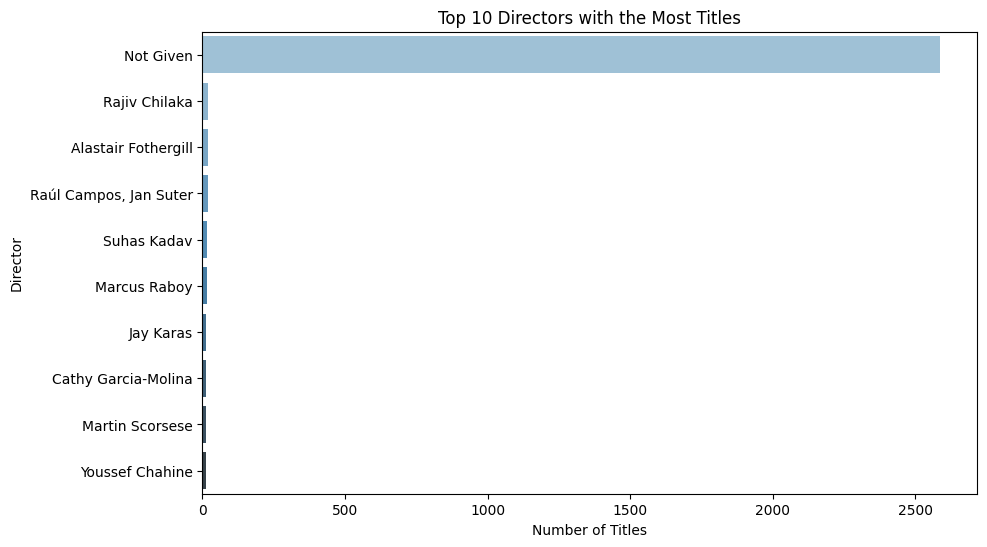


--- EDA: Top 15 directors across Netflix with high frequency of Movies and TV Shows ---
                        director  count
1                  Rajiv Chilaka     20
2            Alastair Fothergill     18
3         Raúl Campos, Jan Suter     18
4                    Suhas Kadav     16
5                   Marcus Raboy     16
6                      Jay Karas     14
7            Cathy Garcia-Molina     13
9                Youssef Chahine     12
10                   Jay Chapman     12
8                Martin Scorsese     12
11              Steven Spielberg     11
12  Mark Thornton, Todd Kauffman     10
13              Don Michael Paul     10
14                  David Dhawan      9


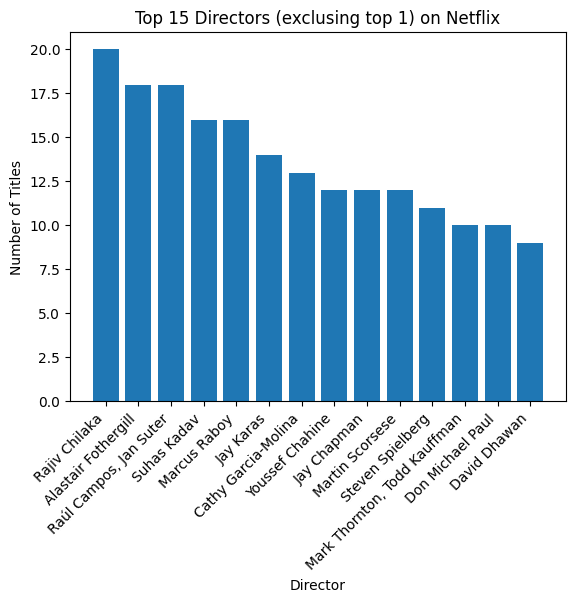

In [46]:
print("\n--- EDA: Top 10 Directors with the Most Titles ---")

# Ensure 'director' column is not null before counting
top_directors = data['director'].value_counts().head(10)
print(top_directors)

plt.figure(figsize = (10, 6))
sns.barplot(x = top_directors.values, y = top_directors.index, palette = 'Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#Replicating Top 15 Directors
print("\n--- EDA: Top 15 directors across Netflix with high frequency of Movies and TV Shows ---")
directors_sample_output = data['director'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[1:15] # Here the 1st director is skipped that is why [1:15]
print(directors_sample_output)
plt.bar(directors_sample_output['director'], directors_sample_output['count'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 15 Directors (exclusing top 1) on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()

#### 5. Word Cloud of Movie Titles


--- EDA: Word CLoud of Movie Titles ---


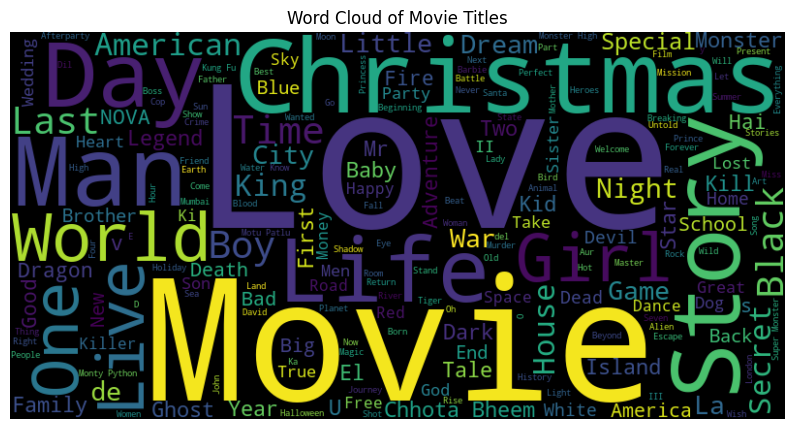

In [47]:
print("\n--- EDA: Word CLoud of Movie Titles ---")
movie_titles = data[data['type'] == 'Movie']['title']

# Ensuring that there are Movie Titles to generate a Word Cloud
if not movie_titles.empty:
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'black').generate(' '.join(movie_titles.dropna()))
    plt.figure(figsize = (10, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Movie Titles')
    plt.show()
else:
    print("No Movie Titles found to generate a Word Cloud.")


#### Additional Exploratory Data Analysis (EDA)


--- EDA: Rating Frequency on Netflix ---
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


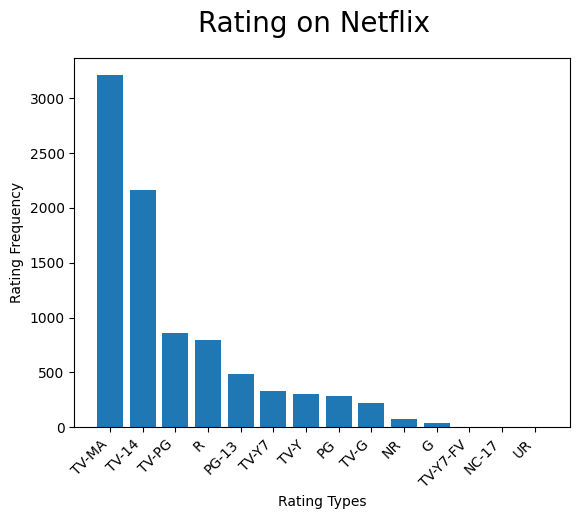

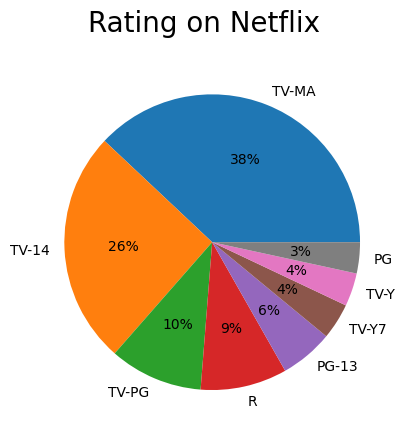


--- EDA: Top 10 Countries with most content on Netflix ---
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64


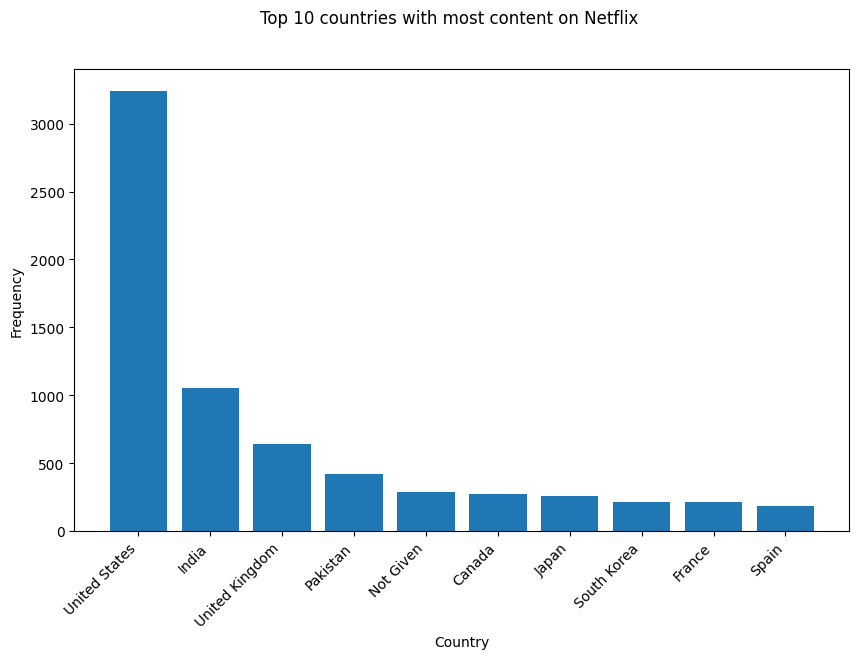


--- EDA: Top 10 popular genres for movies on Netflix ---
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64


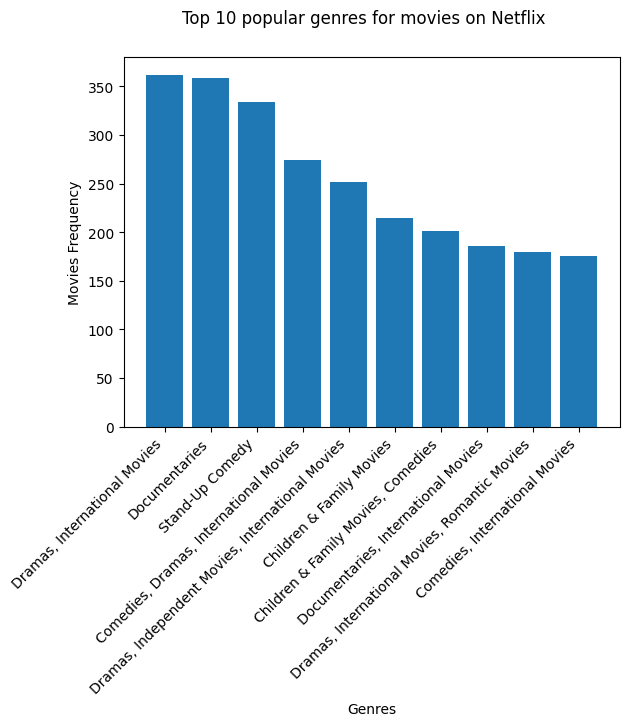


--- EDA: Top 10 popular genres for TV Shows on Netflix ---
listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64


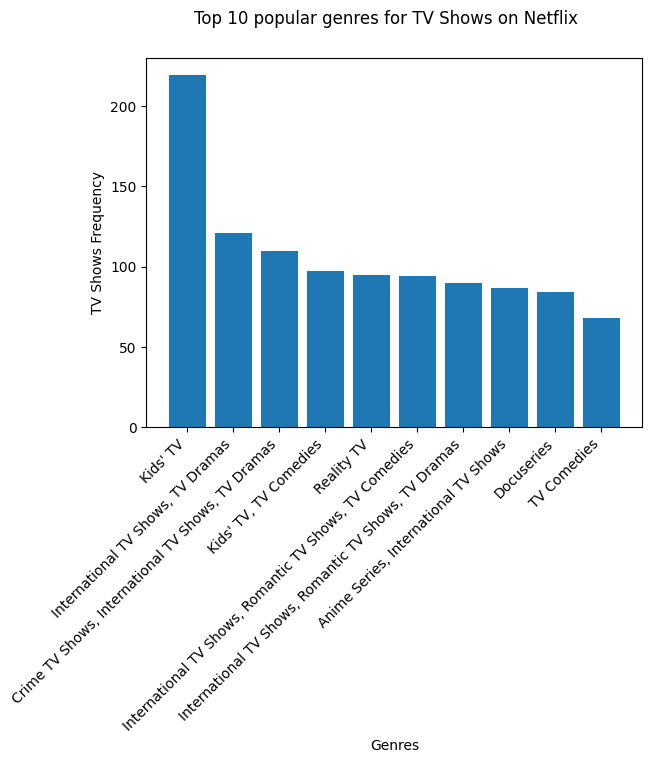

In [48]:
# Visual Representation of Rating Frequency of Movies and TV Shows on Netflix
print("\n--- EDA: Rating Frequency on Netflix ---")
rating_counts = data['rating'].value_counts()
print(rating_counts)

# Bar plot for Ratings
ratings_df = data['rating'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
plt.bar(ratings_df['rating'], ratings_df['count'])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize = 20)
plt.show()

# Pie Chart for Top 8 Ratings
plt.pie(ratings_df['count'][:8], labels = ratings_df['rating'][:8], autopct = '%.0f%%')
plt.suptitle('Rating on Netflix', fontsize = 20)
plt.show()

# Top 10 countries with most content on Netflix
print("\n--- EDA: Top 10 Countries with most content on Netflix ---")
country_counts = data['country'].value_counts()
print(country_counts) # Printing all Country counts first
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[:10] # Trimming down to only top 10 values
plt.figure(figsize = (10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

# Top 10 popular Movie Genres
print("\n--- EDA: Top 10 popular genres for movies on Netflix ---")
pop_movie_genre = data[data['type'] == 'Movie'].groupby("listed_in").size().sort_values(ascending = False)[:10]
print(pop_movie_genre)
plt.bar(pop_movie_genre.index, pop_movie_genre.values)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

# Top 10 TV Shows Genres
print("\n--- EDA: Top 10 popular genres for TV Shows on Netflix ---")
popular_series_genre = data[data['type'] == 'TV Show'].groupby("listed_in").size().sort_values(ascending = False)[:10]
print(popular_series_genre)
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

### Step-5: Conclusion and Insights

In [49]:
print("\n--- Conclusion and Insights ---")
print("In this project, we:")
print("1. Cleaned the data by handling missing values, removing duplicates, and converting data types.")
print("2. Explored the data through various visualizations such as bar plots, pie charts, and word clouds.")
print("3. Analyzed content trends over time, identified popular genres, and highlighted top directors and countries.")


--- Conclusion and Insights ---
In this project, we:
1. Cleaned the data by handling missing values, removing duplicates, and converting data types.
2. Explored the data through various visualizations such as bar plots, pie charts, and word clouds.
3. Analyzed content trends over time, identified popular genres, and highlighted top directors and countries.
